# Unsupervised Machine Learning: Clustering [6.5] - Task

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

##### --------------------------------------------------

### [1] Install and import all necessary libraries in your Jupyter notebook.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [47]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

##### --------------------------------------------------

### [2] Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

#### - Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

#### - Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [48]:
# Assigning Path

path = r'/Users/elia/Desktop/DATA ANALYST/CAREER FOUNDRY/B - Data Analytics Immersion/6 - ADVANCED ANALYTICS & DASHBOARD'

In [49]:
# Import DataSet

df_house = pd.read_csv(os.path.join(path, 'House Market King County USA', '02 - Data', 'Prepared Data', 'house_dataset_clean.csv'))

In [50]:
df_house.shape

(21613, 26)

In [51]:
df_house.head()

,Unnamed: 0,house_id,date,price,bedrooms,bathrooms,house_total_sqft,lot_total_sqft,floors,waterfront,...,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,waterfront_text,view_text,house_condition,grade_text
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,0,98178,47.5112,-122.257,1340,5650,No,No View,Average,Average
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,1991,98125,47.7210,-122.319,1690,7639,No,No View,Average,Average
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,0,98028,47.7379,-122.233,2720,8062,No,No View,Average,Low Average
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,0,98136,47.5208,-122.393,1360,5000,No,No View,Very Good,Average
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,0,98074,47.6168,-122.045,1800,7503,No,No View,Average,Good


In [52]:
df_house.columns

Index(['Unnamed: 0', 'house_id', 'date', 'price', 'bedrooms', 'bathrooms',
       'house_total_sqft', 'lot_total_sqft', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'floors_sqft', 'basement_sqft', 'year_built',
       'year_renovated', 'zipcode', 'latitude', 'longitude', 'sqft_living15',
       'sqft_lot15', 'waterfront_text', 'view_text', 'house_condition',
       'grade_text'],
      dtype='object')

In [53]:
df_house.head(10)

,Unnamed: 0,house_id,date,price,bedrooms,bathrooms,house_total_sqft,lot_total_sqft,floors,waterfront,...,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,waterfront_text,view_text,house_condition,grade_text
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,0,98178,47.5112,-122.257,1340,5650,No,No View,Average,Average
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,1991,98125,47.7210,-122.319,1690,7639,No,No View,Average,Average
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,0,98028,47.7379,-122.233,2720,8062,No,No View,Average,Low Average
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,0,98136,47.5208,-122.393,1360,5000,No,No View,Very Good,Average
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,0,98074,47.6168,-122.045,1800,7503,No,No View,Average,Good
5,5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,...,0,98053,47.6561,-122.005,4760,101930,No,No View,Average,Excellent
6,6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,...,0,98003,47.3097,-122.327,2238,6819,No,No View,Average,Average
7,7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,...,0,98198,47.4095,-122.315,1650,9711,No,No View,Average,Average
8,8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,...,0,98146,47.5123,-122.337,1780,8113,No,No View,Average,Average
9,9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,...,0,98038,47.3684,-122.031,2390,7570,No,No View,Average,Average


In [54]:
df_house.shape

(21613, 26)

##### Missing values

In [55]:
# Check for missing values

df_house.isnull().sum()

Unnamed: 0          0
house_id            0
date                0
price               0
bedrooms            0
bathrooms           0
house_total_sqft    0
lot_total_sqft      0
floors              0
waterfront          0
view                0
condition           0
grade               0
floors_sqft         0
basement_sqft       0
year_built          0
year_renovated      0
zipcode             0
latitude            0
longitude           0
sqft_living15       0
sqft_lot15          0
waterfront_text     0
view_text           0
house_condition     0
grade_text          0
dtype: int64

##### No missing values to handle

In [56]:
df_house.dtypes

Unnamed: 0            int64
house_id              int64
date                 object
price               float64
bedrooms              int64
bathrooms           float64
house_total_sqft      int64
lot_total_sqft        int64
floors              float64
waterfront            int64
view                  int64
condition             int64
grade                 int64
floors_sqft           int64
basement_sqft         int64
year_built            int64
year_renovated        int64
zipcode               int64
latitude            float64
longitude           float64
sqft_living15         int64
sqft_lot15            int64
waterfront_text      object
view_text            object
house_condition      object
grade_text           object
dtype: object

##### Duplicates check

In [57]:
dups = df_house.duplicated()

In [58]:
dups.shape

(21613,)

##### No Duplicates

In [59]:
# Create a data frame with just few variables for clustering that can be used (they need to be all numeric variables)

data_plot = df_house[['price', 'house_total_sqft', 'grade', 'bathrooms', 'bedrooms']]

In [60]:
data_plot.head(10)

,price,house_total_sqft,grade,bathrooms,bedrooms
0,221900.0,1180,7,1.00,3
1,538000.0,2570,7,2.25,3
2,180000.0,770,6,1.00,2
3,604000.0,1960,7,3.00,4
4,510000.0,1680,8,2.00,3
5,1225000.0,5420,11,4.50,4
6,257500.0,1715,7,2.25,3
7,291850.0,1060,7,1.50,3
8,229500.0,1780,7,1.00,3
9,323000.0,1890,7,2.50,3


In [61]:
data_plot.dtypes

price               float64
house_total_sqft      int64
grade                 int64
bathrooms           float64
bedrooms              int64
dtype: object

In [62]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit & transform your data
data_scaled = scaler.fit_transform(data_plot)

# Convert back to a DataFrame if you want
data_scaled = pd.DataFrame(data_scaled, columns=data_plot.columns)

In [63]:
data_scaled.head(10)

,price,house_total_sqft,grade,bathrooms,bedrooms
0,-0.866717,-0.979835,-0.558836,-1.447464,-0.398737
1,-0.005688,0.533634,-0.558836,0.175607,-0.398737
2,-0.980849,-1.426254,-1.409587,-1.447464,-1.473959
3,0.174090,-0.130550,-0.558836,1.149449,0.676485
4,-0.081958,-0.435422,0.291916,-0.149007,-0.398737
5,1.865641,3.636791,2.844170,3.097133,0.676485
6,-0.769746,-0.397313,-0.558836,0.175607,-0.398737
7,-0.676180,-1.110494,-0.558836,-0.798235,-0.398737
8,-0.846016,-0.326539,-0.558836,-1.447464,-0.398737
9,-0.591330,-0.206768,-0.558836,0.500221,-0.398737


##### --------------------------------------------------

### [3] Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [64]:
# Defines the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [65]:
 # Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(data_scaled).score(data_scaled) for i in range(len(kmeans))]

score

[-108064.99999999997,
 -65091.68497127251,
 -49726.67716230948,
 -42499.747985467286,
 -39106.34052238956,
 -34468.76712276854,
 -31865.72531112405,
 -30087.016755308432,
 -29800.96517199019]

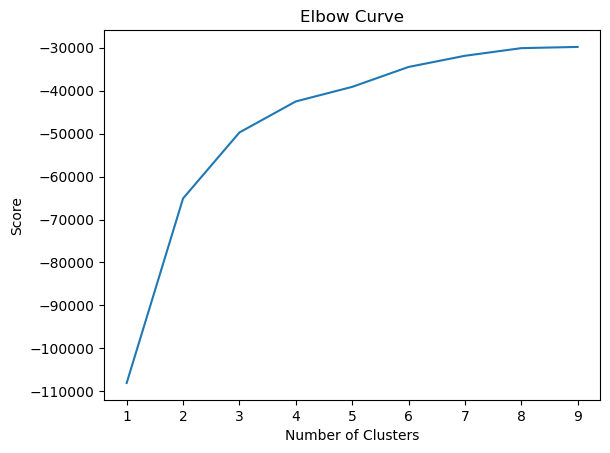

In [66]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### --------------------------------------------------

### [4] Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

#### - Explain why you chose that number in a markdown cell.

#### From what i have just learned in the lesson:
#### The ideal cluster number is usually the last major "bump" before the curve starts to flatten out.
#### Therefore in my Elbow Curve Chart that number for me is 3.

##### --------------------------------------------------

### [5] Run the k-means algorithm.

In [91]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [92]:
# Fit the k-means object to the data.

kmeans.fit(data_scaled)

KMeans(n_clusters=3)

##### --------------------------------------------------

### [6] Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [93]:
data_scaled['clusters'] = kmeans.fit_predict(data_scaled)

In [94]:
data_scaled.head(10)

,price,house_total_sqft,grade,bathrooms,bedrooms,clusters
0,-0.866717,-0.979835,-0.558836,-1.447464,-0.398737,2
1,-0.005688,0.533634,-0.558836,0.175607,-0.398737,1
2,-0.980849,-1.426254,-1.409587,-1.447464,-1.473959,2
3,0.174090,-0.130550,-0.558836,1.149449,0.676485,1
4,-0.081958,-0.435422,0.291916,-0.149007,-0.398737,1
5,1.865641,3.636791,2.844170,3.097133,0.676485,0
6,-0.769746,-0.397313,-0.558836,0.175607,-0.398737,1
7,-0.676180,-1.110494,-0.558836,-0.798235,-0.398737,2
8,-0.846016,-0.326539,-0.558836,-1.447464,-0.398737,2
9,-0.591330,-0.206768,-0.558836,0.500221,-0.398737,1


In [95]:
data_scaled['clusters'].value_counts()

clusters
1    9341
2    6726
0    5546
Name: count, dtype: int64

##### --------------------------------------------------

### [7] Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

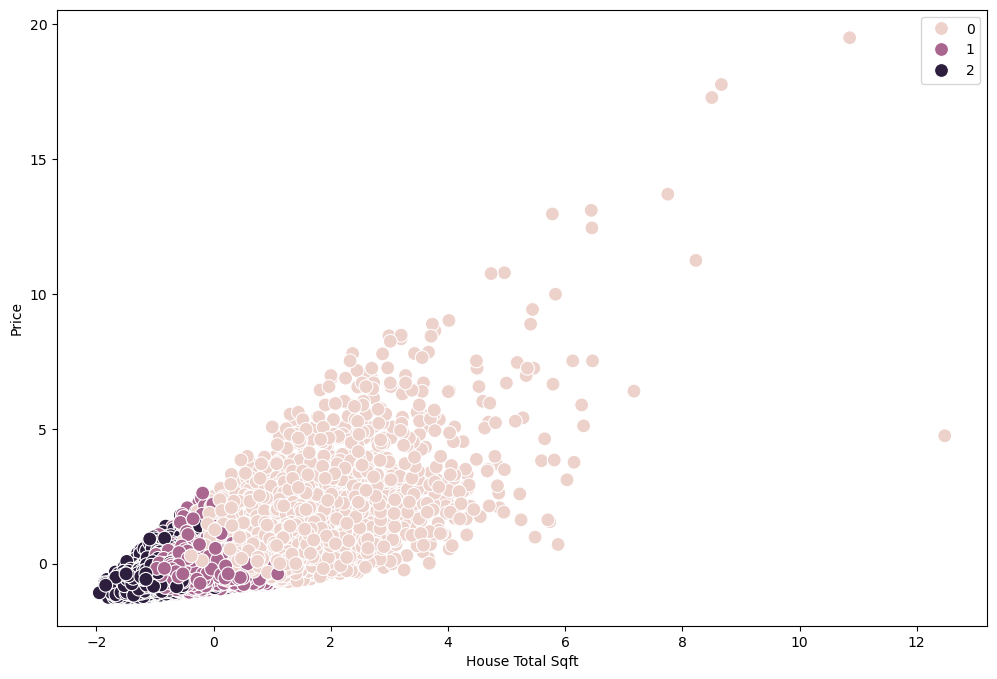

In [96]:
# Plot the clusters for the "price" and "house_total_sqft" variables.

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_scaled['house_total_sqft'], y=data_scaled['price'], hue=kmeans.labels_, s=100) 

# This removes the grid from the background.

ax.grid(False)
plt.xlabel('House Total Sqft')
plt.ylabel('Price')
plt.show()

#### The three clusters help separate the data into meaningful groups: the darkest points represent smaller lower priced homes; the mid shade points represent medium sized / mid priced homes; and the lightest points represent the largest and most expensive properties.

#### Even though the clusters overlap slightly because housing features naturally blend, the overall pattern is clear: bigger homes fall into higher priced segments, while smaller ones remain in the lower price range.

#### This gives a reasonable, interpretable structure to the data, but it doesn't add much from the previous analysis step.

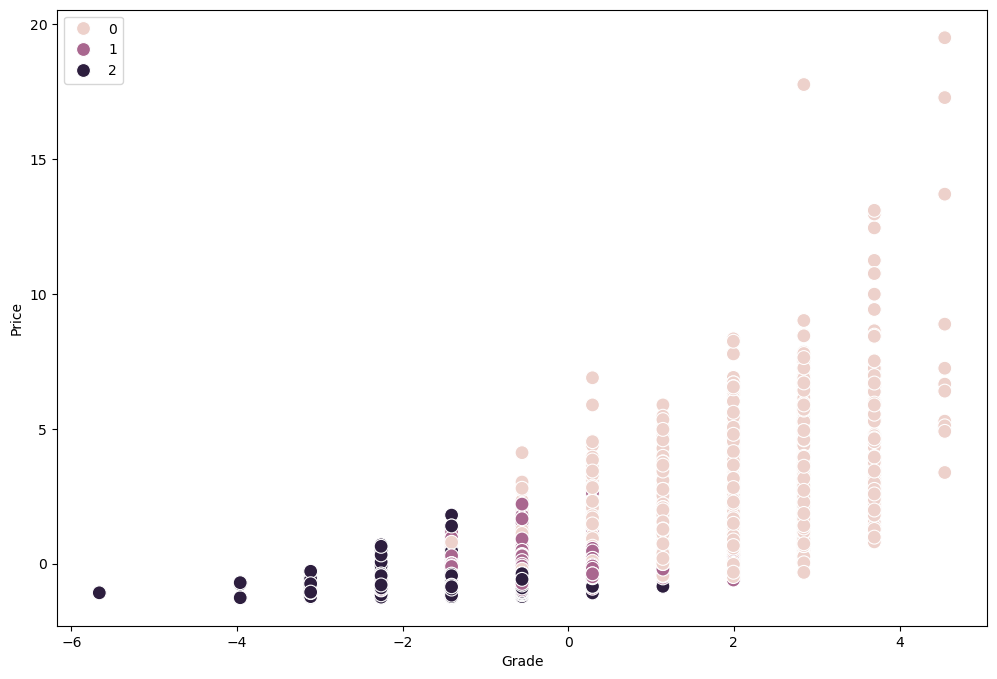

In [97]:
# Plot the clusters for the "price" and "grade" variables.

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_scaled['grade'], y=data_scaled['price'], hue=kmeans.labels_, s=100) 

# This removes the grid from the background.

ax.grid(False)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

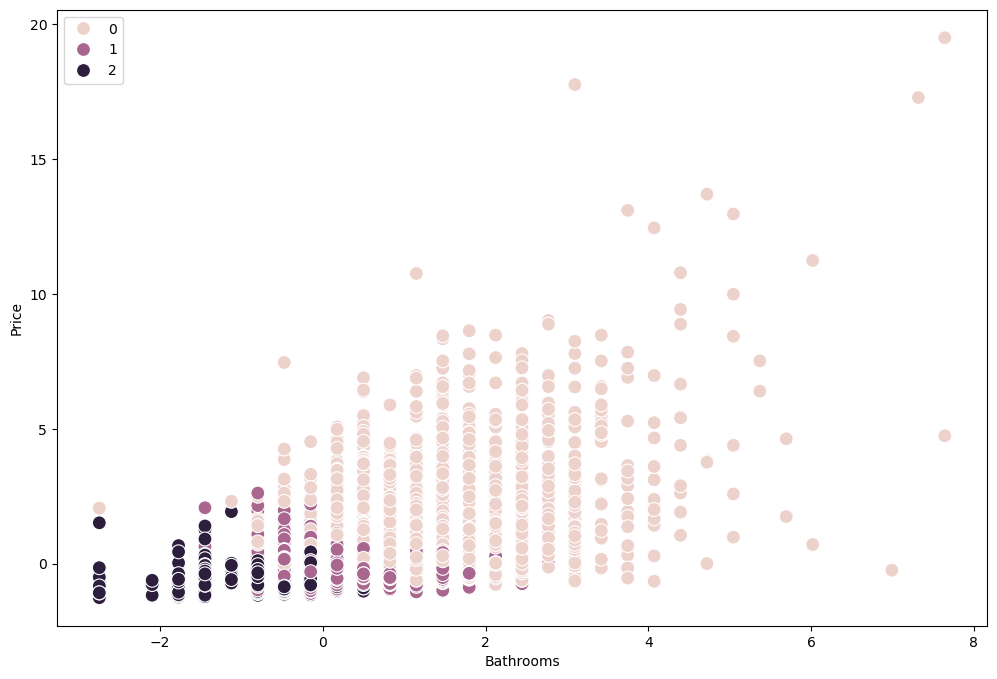

In [98]:
# Plot the clusters for the "price" and "bathrooms" variables.

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_scaled['bathrooms'], y=data_scaled['price'], hue=kmeans.labels_, s=100) 

# This removes the grid from the background.

ax.grid(False)
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

##### --------------------------------------------------

### [8] Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. | Note down your thoughts in a markdown cell.

#### These clusters don’t form clear, meaningful groups in these scatterplots. Instead, all the colors overlap heavily because the variables (price, sqft, grade, bathrooms) follow smooth continuous trends rather than distinct categories.

#### K-means is forcing artificial groups into data that naturally forms gradients, not clusters. This shows that while the algorithm can divide the points into segments, those segments don’t represent real, separate patterns in the housing market, so different variables or methods may be needed to find more meaningful structure.

##### --------------------------------------------------

### [9] Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [100]:
data_scaled.loc[data_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
data_scaled.loc[data_scaled['clusters'] == 1, 'cluster'] = 'purple'
data_scaled.loc[data_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [103]:
data_scaled.groupby('cluster').agg({'house_total_sqft':['mean', 'median'], 
                         'grade':['mean', 'median'], 
                         'bathrooms':['mean', 'median'],
                          'price':['mean', 'median']})

house_total_sqft               grade           bathrooms  \
                        mean    median      mean    median      mean   
cluster                                                                
dark purple        -0.890167 -0.903617 -0.809153 -0.558836 -1.053014   
pink                1.262854  1.067160  1.201419  1.142667  1.001541   
purple             -0.108824 -0.130550 -0.130682 -0.558836  0.163583   

                          price            
               median      mean    median  
cluster                                    
dark purple -1.447464 -0.520190 -0.585882  
pink         0.824835  1.010087  0.660309  
purple       0.175607 -0.225152 -0.286251

#### I cannot really see much real information here, because my values are still standardised.

##### --------------------------------------------------

### [10] Propose what these results could be useful for in future steps of an analytics pipeline.

#### Even if these groups are not perfectly separated, they still give a quick idea of how similar houses behave based on size, quality, and price. This can guide future analysis like choosing better features, understanding market segments, find new datasets if available and "enrich" this dataframe, or preparing the data for a more accurate predictive model. The clusters basically help point you in another direction for the next steps in the analysis.

##### --------------------------------------------------